<a href="https://colab.research.google.com/github/Ajasahmed3182/DM_Programming-Assignment/blob/main/Pedda_Shali_Programming_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [8]:
file_ = open("/content/drive/MyDrive/data_mining/Grocery_Items_51.csv")

In [9]:
data_string = file_.read()

In [10]:
data = []
for line in data_string.split("\n")[1:-1]:
  temp = line.split(",")
  temp = list(filter(lambda x: x != '', temp))
  data.append(temp)


# 1 (c)

In [11]:
def get_association_rules(data,min_support,min_confidence_threshold):
  te = TransactionEncoder()
  te_ary = te.fit(data).transform(data)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)
  return rules


In [12]:
rules = get_association_rules(data,0.01,0.1)

In [36]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.120750,0.163625,0.014500,0.120083,0.733890,-0.005258,0.950516,-0.291984
1,(rolls/buns),(whole milk),0.110875,0.163625,0.015375,0.138670,0.847485,-0.002767,0.971027,-0.168333
2,(rolls/buns),(other vegetables),0.110875,0.120750,0.011625,0.104848,0.868305,-0.001763,0.982235,-0.145725
3,(yogurt),(whole milk),0.087875,0.163625,0.012375,0.140825,0.860657,-0.002004,0.973463,-0.150744
4,(soda),(other vegetables),0.098250,0.120750,0.010125,0.103053,0.853445,-0.001739,0.980270,-0.159969
5,(soda),(whole milk),0.098250,0.163625,0.014125,0.143766,0.878630,-0.001951,0.976806,-0.132837


# 1 (d)

In [14]:
min_supports_values = [0.001, 0.005, 0.01]
min_confidence_values = [0.05, 0.075, 0.1]
heat_map = []
for min_confidence in min_confidence_values:
  temp = []
  for min_support in min_supports_values:
    rules = get_association_rules(data,min_support,min_confidence)
    temp.append(len(rules))
  heat_map.append(temp)

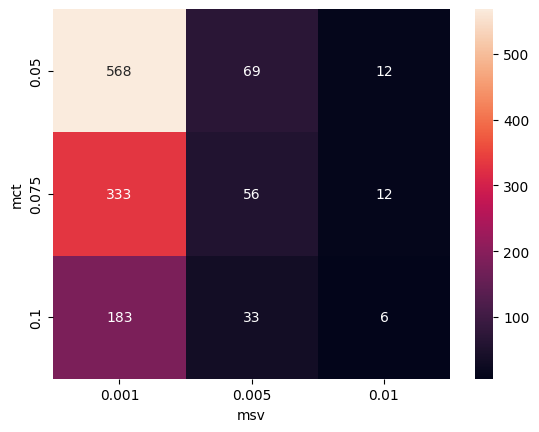

In [15]:
sns.heatmap(heat_map, annot=True,fmt='d')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=min_supports_values)  # X-axis ticks
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=min_confidence_values)  # Y-axis ticks
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()

# 1 (e)

In [16]:
import random

In [17]:
random.shuffle(data)

In [18]:
midpoint = len(data) // 2

part1 = data[:midpoint]
part2 = data[midpoint:]

In [19]:
rules1 = get_association_rules(part1,min_support=0.005,min_confidence_threshold=0.075)
rules2 = get_association_rules(part2,min_support=0.005,min_confidence_threshold=0.075)


In [20]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(margarine),(whole milk),0.03200,0.16475,0.00625,0.195312,1.185508,0.000978,1.037981,0.161653
1,(rolls/buns),(other vegetables),0.11275,0.12075,0.01200,0.106430,0.881409,-0.001615,0.983975,-0.131677
2,(other vegetables),(rolls/buns),0.12075,0.11275,0.01200,0.099379,0.881409,-0.001615,0.985153,-0.132716
3,(rolls/buns),(whole milk),0.11275,0.16475,0.01450,0.128603,0.780595,-0.004076,0.958518,-0.240578
4,(whole milk),(rolls/buns),0.16475,0.11275,0.01450,0.088012,0.780595,-0.004076,0.972875,-0.251785
5,(frankfurter),(other vegetables),0.03925,0.12075,0.00625,0.159236,1.318722,0.001511,1.045775,0.251564
6,(soda),(whole milk),0.10225,0.16475,0.01475,0.144254,0.875595,-0.002096,0.976049,-0.136638
7,(whole milk),(soda),0.16475,0.10225,0.01475,0.089530,0.875595,-0.002096,0.986029,-0.145376
8,(soda),(other vegetables),0.10225,0.12075,0.01000,0.097800,0.809934,-0.002347,0.974562,-0.207228
9,(other vegetables),(soda),0.12075,0.10225,0.01000,0.082816,0.809934,-0.002347,0.978811,-0.210670


In [21]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(rolls/buns),0.04675,0.10900,0.00650,0.139037,1.275573,0.001404,1.034888,0.226634
1,(bottled beer),(whole milk),0.04675,0.16250,0.00825,0.176471,1.085973,0.000653,1.016964,0.083049
2,(bottled beer),(other vegetables),0.04675,0.12075,0.00525,0.112299,0.930016,-0.000395,0.990480,-0.073165
3,(domestic eggs),(whole milk),0.04025,0.16250,0.00550,0.136646,0.840898,-0.001041,0.970054,-0.164675
4,(frankfurter),(rolls/buns),0.04000,0.10900,0.00525,0.131250,1.204128,0.000890,1.025612,0.176587
5,(frankfurter),(whole milk),0.04000,0.16250,0.00550,0.137500,0.846154,-0.001000,0.971014,-0.159236
6,(whole milk),(yogurt),0.16250,0.09225,0.01400,0.086154,0.933917,-0.000991,0.993329,-0.077906
7,(yogurt),(whole milk),0.09225,0.16250,0.01400,0.151762,0.933917,-0.000991,0.987340,-0.072313
8,(yogurt),(other vegetables),0.09225,0.12075,0.00725,0.078591,0.650855,-0.003889,0.954245,-0.371447
9,(soda),(yogurt),0.09425,0.09225,0.00750,0.079576,0.862608,-0.001195,0.986230,-0.149550


In [22]:
pd.merge(rules1, rules2, on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(rolls/buns),(other vegetables),0.11275,0.12075,0.01200,0.106430,0.881409,-0.001615,0.983975,-0.131677,0.10900,0.12075,0.01125,0.103211,0.854750,-0.001912,0.980442,-0.160173
1,(other vegetables),(rolls/buns),0.12075,0.11275,0.01200,0.099379,0.881409,-0.001615,0.985153,-0.132716,0.12075,0.10900,0.01125,0.093168,0.854750,-0.001912,0.982541,-0.161967
2,(rolls/buns),(whole milk),0.11275,0.16475,0.01450,0.128603,0.780595,-0.004076,0.958518,-0.240578,0.10900,0.16250,0.01625,0.149083,0.917431,-0.001462,0.984232,-0.091743
3,(whole milk),(rolls/buns),0.16475,0.11275,0.01450,0.088012,0.780595,-0.004076,0.972875,-0.251785,0.16250,0.10900,0.01625,0.100000,0.917431,-0.001462,0.990000,-0.097035
4,(soda),(whole milk),0.10225,0.16475,0.01475,0.144254,0.875595,-0.002096,0.976049,-0.136638,0.09425,0.16250,0.01350,0.143236,0.881453,-0.001816,0.977515,-0.129288
5,(whole milk),(soda),0.16475,0.10225,0.01475,0.089530,0.875595,-0.002096,0.986029,-0.145376,0.16250,0.09425,0.01350,0.083077,0.881453,-0.001816,0.987815,-0.138366
6,(soda),(other vegetables),0.10225,0.12075,0.01000,0.097800,0.809934,-0.002347,0.974562,-0.207228,0.09425,0.12075,0.01025,0.108753,0.900649,-0.001131,0.986539,-0.108567
7,(other vegetables),(soda),0.12075,0.10225,0.01000,0.082816,0.809934,-0.002347,0.978811,-0.210670,0.12075,0.09425,0.01025,0.084886,0.900649,-0.001131,0.989768,-0.111475
8,(soda),(rolls/buns),0.10225,0.11275,0.00875,0.085575,0.758976,-0.002779,0.970281,-0.261302,0.09425,0.10900,0.00800,0.084881,0.778721,-0.002273,0.973643,-0.238806
9,(yogurt),(other vegetables),0.08350,0.12075,0.01000,0.119760,0.991805,-0.000083,0.998876,-0.008935,0.09225,0.12075,0.00725,0.078591,0.650855,-0.003889,0.954245,-0.371447


# Create Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])



In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Read Image Data

In [26]:
path = "/content/drive/MyDrive/data_mining/processed"

In [27]:
batch_size = 4
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=0
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=0
)

Found 607 files belonging to 4 classes.
Using 486 files for training.
Found 607 files belonging to 4 classes.
Using 121 files for validation.


# Train Model

In [28]:
history = model.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
122/122 [==============================] - 76s 576ms/step - loss: 279.2491 - accuracy: 0.2634 - val_loss: 1.3876 - val_accuracy: 0.1983
Epoch 2/20
122/122 [==============================] - 15s 124ms/step - loss: 1.3861 - accuracy: 0.2572 - val_loss: 1.3888 - val_accuracy: 0.1983
Epoch 3/20
122/122 [==============================] - 16s 126ms/step - loss: 1.3858 - accuracy: 0.2572 - val_loss: 1.3893 - val_accuracy: 0.1983
Epoch 4/20
122/122 [==============================] - 15s 126ms/step - loss: 1.3856 - accuracy: 0.2572 - val_loss: 1.3896 - val_accuracy: 0.1983
Epoch 5/20
122/122 [==============================] - 17s 138ms/step - loss: 1.3854 - accuracy: 0.2572 - val_loss: 1.3901 - val_accuracy: 0.1983
Epoch 6/20
122/122 [==============================] - 15s 126ms/step - loss: 1.3853 - accuracy: 0.2572 - val_loss: 1.3909 - val_accuracy: 0.1983
Epoch 7/20
122/122 [==============================] - 17s 134ms/step - loss: 1.3851 - accuracy: 0.2593 - val_loss: 1.3912 - val_

# 2(a)

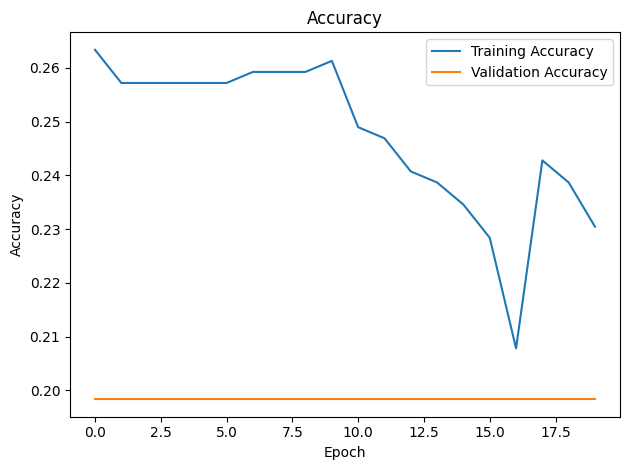

In [29]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2 (b)

**Creating model with CNN layer Kernel size 5 X 5 and 7 X 7**

In [30]:
new_model1 = Sequential([
    Conv2D(8, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

new_model2 = Sequential([
    Conv2D(8, (7, 7), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])




In [31]:
new_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
new_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [39]:
new_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 252, 252, 8)       608       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 8)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                2032144   
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2032820 (7.75 MB)
Trainable params: 2032820 (7.75 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [38]:
new_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 8)       1184      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 125, 125, 8)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 125000)            0         
                                                                 
 dense_4 (Dense)             (None, 16)                2000016   
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2001268 (7.63 MB)
Trainable params: 2001268 (7.63 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [32]:
new_history1 = new_model1.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
122/122 [==============================] - 26s 208ms/step - loss: 35.1331 - accuracy: 0.2634 - val_loss: 2.1822 - val_accuracy: 0.2397
Epoch 2/20
122/122 [==============================] - 24s 195ms/step - loss: 1.4104 - accuracy: 0.3930 - val_loss: 1.5965 - val_accuracy: 0.2645
Epoch 3/20
122/122 [==============================] - 24s 193ms/step - loss: 1.0950 - accuracy: 0.5062 - val_loss: 1.6092 - val_accuracy: 0.2893
Epoch 4/20
122/122 [==============================] - 25s 207ms/step - loss: 1.0071 - accuracy: 0.5473 - val_loss: 2.1259 - val_accuracy: 0.2479
Epoch 5/20
122/122 [==============================] - 25s 205ms/step - loss: 0.8874 - accuracy: 0.5741 - val_loss: 1.9660 - val_accuracy: 0.2727
Epoch 6/20
122/122 [==============================] - 23s 184ms/step - loss: 0.9129 - accuracy: 0.6173 - val_loss: 2.0718 - val_accuracy: 0.2397
Epoch 7/20
122/122 [==============================] - 26s 211ms/step - loss: 1.0127 - accuracy: 0.6070 - val_loss: 1.9079 - val_a

In [33]:
new_history2 = new_model2.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
122/122 [==============================] - 34s 273ms/step - loss: 130.4079 - accuracy: 0.2428 - val_loss: 1.4658 - val_accuracy: 0.3306
Epoch 2/20
122/122 [==============================] - 33s 272ms/step - loss: 1.2917 - accuracy: 0.3827 - val_loss: 1.5041 - val_accuracy: 0.3140
Epoch 3/20
122/122 [==============================] - 36s 298ms/step - loss: 1.1200 - accuracy: 0.4774 - val_loss: 1.6893 - val_accuracy: 0.2810
Epoch 4/20
122/122 [==============================] - 33s 266ms/step - loss: 1.1383 - accuracy: 0.4979 - val_loss: 1.6346 - val_accuracy: 0.3306
Epoch 5/20
122/122 [==============================] - 33s 270ms/step - loss: 0.9600 - accuracy: 0.5700 - val_loss: 1.7658 - val_accuracy: 0.3223
Epoch 6/20
122/122 [==============================] - 33s 273ms/step - loss: 0.9432 - accuracy: 0.6091 - val_loss: 2.3404 - val_accuracy: 0.2975
Epoch 7/20
122/122 [==============================] - 35s 286ms/step - loss: 0.8855 - accuracy: 0.6091 - val_loss: 2.0253 - val_

# 2 (c)

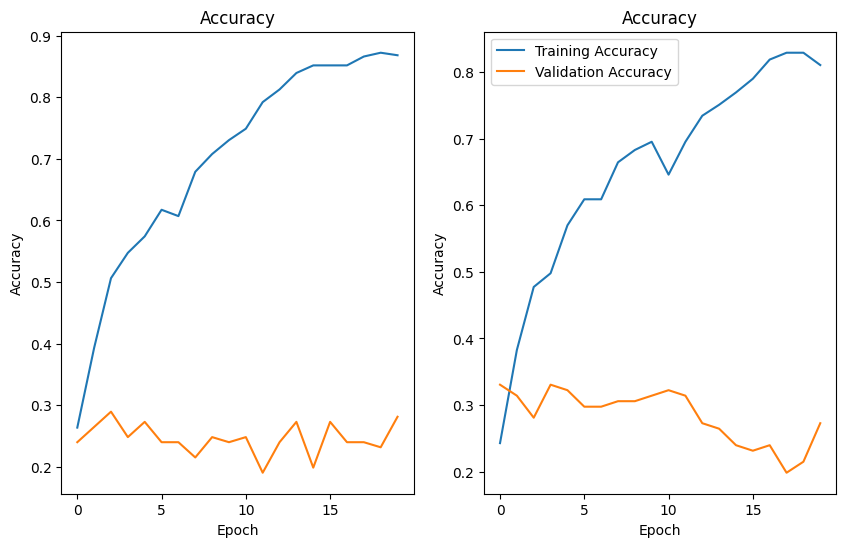

In [35]:

training_accuracy1 = new_history1.history['accuracy']
validation_accuracy1 = new_history1.history['val_accuracy']

training_accuracy2 = new_history2.history['accuracy']
validation_accuracy2 = new_history2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(10,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


# 2 (d)

1. First Model is underfitting as both accuracies are low and remained flat after intial epochs
2. The experiment model with kernel size (5 X 5 ) overfitted as train accuracy reached 0.94 but validation accuracy remained below 0.25
3. The experiment model with kernel size (7 X 7 ) overfitted as train accuracy reached 0.81 but validation accuracy remained below 0.32